## 5.1 多元线性回归

代码 5.1

In [1]:
from numpy.linalg import inv 
from numpy import dot, transpose 
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]] 
y = [[7], [9], [13], [17.5], [18]] 
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


代码 5.2

In [2]:
from numpy.linalg import lstsq 
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]] 
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


C:\Users\liye\AppData\Local\Temp\ipykernel_7920\2972321997.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print(lstsq(X, y)[0])


代码 5.3

In [3]:
from sklearn.linear_model import LinearRegression 
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]] 
y = [[7], [9], [13], [17.5], [18]] 
model = LinearRegression() 
model.fit(X, y) 
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]] 
y_test = [[11], [8.5], [15], [18], [11]] 
predictions = model.predict(X_test) 
for i, prediction in enumerate(predictions): 
 print('Predicted: %s, Target: %s' % (prediction, y_test[i])) 
 print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


## 5.2 多项式回归

代码 5.4

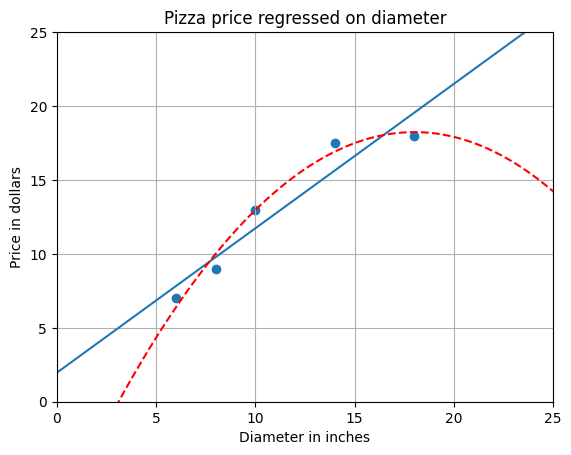

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
X_train = [[6], [8], [10], [14], [18]] 
y_train = [[7], [9], [13], [17.5], [18]] 
X_test = [[6], [8], [11], [16]] 
y_test = [[8], [12], [15], [18]] 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
xx = np.linspace(0, 26, 100) 
yy = regressor.predict(xx.reshape(xx.shape[0], 1)) 
plt.plot(xx, yy) 
quadratic_featurizer = PolynomialFeatures(degree=2) 
X_train_quadratic = quadratic_featurizer.fit_transform(X_train) 
X_test_quadratic = quadratic_featurizer.transform(X_test) 
regressor_quadratic = LinearRegression() 
regressor_quadratic.fit(X_train_quadratic, y_train) 
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1)) 
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--') 
plt.title('Pizza price regressed on diameter') 
plt.xlabel('Diameter in inches') 
plt.ylabel('Price in dollars') 
plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.scatter(X_train, y_train) 
plt.show() 
print(X_train) 
print(X_train_quadratic) 
print(X_test) 
print(X_test_quadratic) 
print('Simple linear regression r-squared', regressor.score(X_test, 
y_test)) 
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

## 5.3 正则化

## 5.4 应用线性回归

### 5.4.1 探索数据

代码 5.5

In [5]:
import pandas as pd 
df = pd.read_csv('./winequality-red.csv', sep=';') 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


代码 5.6

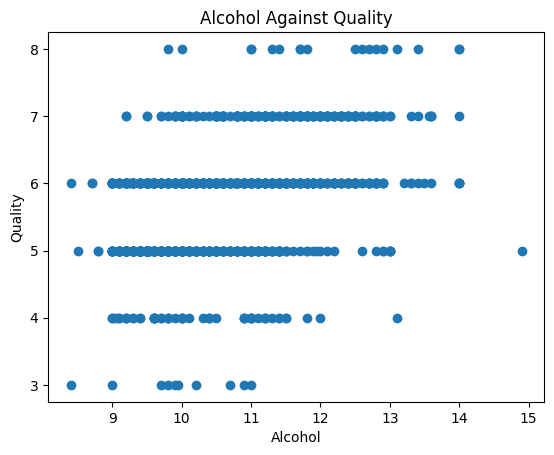

In [6]:
import matplotlib.pylab as plt 
plt.scatter(df['alcohol'], df['quality']) 
plt.xlabel('Alcohol') 
plt.ylabel('Quality') 
plt.title('Alcohol Against Quality') 
plt.show()

### 5.4.2 拟合和评估模型

代码 5.7

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('./winequality-red.csv', sep=';')
# x特征值,不需要最后一列,最后一列是标签值
X = df[list(df.columns)[:-1]]
# y最后一列,也就是标签值
y = df['quality']
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: %s' % regressor.score(X_test, y_test))

(1599, 11)
(1599,)
R-squared: 0.29649505816029165


代码 5.8

In [8]:
import pandas as pd 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression 
df = pd.read_csv('./winequality-red.csv', sep=';') 
X = df[list(df.columns)[:-1]] 
y = df['quality'] 
regressor = LinearRegression() 
scores = cross_val_score(regressor, X, y, cv=5) 
print(scores.mean()) 
print(scores)

0.29004162884219625
[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


代码 5.9

## 5.5 梯度下降法

代码 5.10

In [9]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.datasets import fetch_openml

data = fetch_openml(name='boston', as_frame=True, parser='auto', version=2)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
lb = LabelBinarizer()
# 将标签转换为数值
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379, 1)
(127, 1)


代码 5.11

In [10]:
# 对数据进行标准化
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

# SGDRegressor 是 Scikit-learn（sklearn）库中的一个线性回归模型类，使用随机梯度下降（Stochastic Gradient Descent，SGD）算法进行参数估计。它适用于处理大规模数据集的线性回归问题。
# regressor = SGDRegressor(loss='squared_loss')
# sklearn.utils._param_validation.InvalidParameterError: The 'loss' parameter of SGDRegressor must be a str among {'squared_error', 'squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'}. Got 'squared_loss' instead.
regressor = SGDRegressor(loss='squared_error')
scores = cross_val_score(regressor, X_train, y_train.flatten(), cv=5)
print('Cross validation r-squared scores: %s' % scores)
print('Average cross validation r-squared score: %s' % np.mean(scores))
regressor.fit(X_train, y_train.flatten())
print('Test set r-squared score %s' % regressor.score(X_test, y_test.flatten()))

Cross validation r-squared scores: [0.53011595 0.55477804 0.53371397 0.35134398 0.59522571]
Average cross validation r-squared score: 0.513035530907641
Test set r-squared score 0.4262810498765698
